In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from lxml import html
import numpy as np
from sklearn import preprocessing

In [2]:
studentcountyears = pd.read_csv('../data/Maryland_Public_School_Enrollment_Trends__Pre-Kindergarten_to_Grade_12__2010-2021.csv')
countystats = pd.read_csv('../data/Choose_Maryland___Compare_Counties_-_Education.csv', nrows = 24)
meals = pd.read_csv('../data/meals.csv')

meals.rename(columns = {'Agency Name': 'Agency_Name',
                    'F&R/Total': 'freeandreduced_lunch'}, inplace = True) 

meals2021 = meals[meals['Year'] == 2021]
meals2022 = meals[meals['Year'] == 2022]

***MEALS DATA***

In [3]:
meals2022['freeandreduced_lunch'] = meals2022['freeandreduced_lunch'].str.replace('%', '')
meals2022["freeandreduced_lunch"] = meals2022["freeandreduced_lunch"].astype(float)
meals2022['Agency_Name'] = meals2022['Agency_Name'].str.replace('Public Schools', '')
meals2022['Agency_Name'] = meals2022['Agency_Name'].str.replace('Board Of Education', '')

C:\Users\macke\AppData\Local\Temp\ipykernel_23612\2420559593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meals2022['freeandreduced_lunch'] = meals2022['freeandreduced_lunch'].str.replace('%', '')
C:\Users\macke\AppData\Local\Temp\ipykernel_23612\2420559593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meals2022["freeandreduced_lunch"] = meals2022["freeandreduced_lunch"].astype(float)
C:\Users\macke\AppData\Local\Temp\ipykernel_23612\2420559593.py:3: SettingWithCopyWarning: 
A value is trying t

In [4]:
top5discount = meals2022.sort_values(by = ['freeandreduced_lunch'], ascending=False).head(5)
top5discount

,Agency_Name,Year,of sites,Free,Reduced,Paid,Total,freeandreduced_lunch
19,Somerset County,2022,8.0,"2,445",0,296,"2,741",89.20
2,Baltimore City,2022,160.0,"68,772",0,"9,166","77,938",88.24
9,Dorchester County,2022,12.0,"3,871",0,717,"4,588",84.37
14,Kent County,2022,5.0,"1,091",54,658,"1,803",63.51
22,Wicomico County,2022,26.0,"9,229",0,"5,471","14,700",62.78


<BarContainer object of 5 artists>

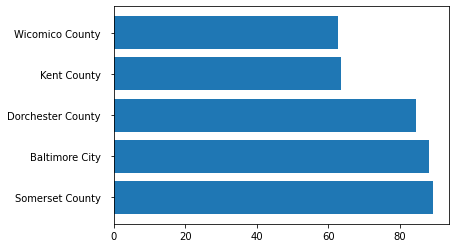

In [5]:
plt.barh(top5discount.Agency_Name,top5discount.freeandreduced_lunch)

***STUDENTS OVER TIME DATA***

In [6]:
studentcountyears1 = studentcountyears[studentcountyears['Grades'] == 'Grades 9-12']

In [7]:
studentcountyears1.rename(columns = {"Baltimore County": "Baltimore_County",
                    "Baltimore City": "Baltimore_City",
                    "Harford County": "Harford_County", 
                    "Allegany County": "Allegany_County", 
                    "Calvert County": "Calvert_County",
                    "Anne Arundel County": "Anne_Arundel_County",
                    "Caroline County": "Caroline_County",
                    "Carroll County": "Carroll_County",
                    "Cecil County": "Cecil_County",
                    "Charles County": "Charles_County",
                    "Dorchester County": "Dorchester_County",
                    "Frederick County": "Frederick_County",
                    "Garrett County": "Garrett_County",
                    "Kent County": "Kent_County",
                    "Montgomery County": "Montgomery_County",
                    "Prince George's County": "Prince_Georges_County",
                    "Queen Anne's County": "Queen_Annes_County",
                    "St. Mary's County": "St_Marys_County",
                    "Somerset County": "Somerset_County",
                    "Talbot County": "Talbot_County",
                    "Washington County": "Washington_County",
                    "Wicomico County": "Wicomico_County",
                    "Worcester County": "Worcester_County"}, inplace = True) 

C:\Users\macke\AppData\Local\Temp\ipykernel_23612\1820129935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studentcountyears1.rename(columns = {"Baltimore County": "Baltimore_County",


In [8]:
studentcountyears1

,Date Created,Grades,Year,Baltimore_City,Allegany_County,Anne_Arundel_County,Baltimore_County,Calvert_County,Caroline_County,Carroll_County,...,Montgomery_County,Prince_Georges_County,Queen_Annes_County,St_Marys_County,Somerset_County,Talbot_County,Washington_County,Wicomico_County,Worcester_County,Maryland
3,01/27/2021,Grades 9-12,2010,24311,2710,22724,31609,5672,1590,9225,...,45307,39337,2446,5177,803,1415,6591,4002,2136,264055
7,01/27/2021,Grades 9-12,2011,23706,2660,22696,30993,5525,1577,9054,...,45232,37272,2412,5220,744,1358,6670,4014,2095,259816
11,01/27/2021,Grades 9-12,2012,23372,2664,22650,31034,5425,1522,8899,...,45150,35938,2315,5048,731,1353,6718,3936,2005,256735
15,01/27/2021,Grades 9-12,2013,22882,2570,22523,30740,5337,1501,8633,...,45132,35174,2325,5075,734,1321,6676,3941,1991,253444
19,01/27/2021,Grades 9-12,2014,22341,2590,22712,30925,5228,1550,8512,...,45633,35495,2296,5008,729,1334,6670,3988,1996,253891
23,01/27/2021,Grades 9-12,2015,21746,2559,22671,31015,5165,1522,8355,...,46122,35393,2237,4929,748,1354,6606,4084,2035,252895
27,01/27/2021,Grades 9-12,2016,21381,2504,22858,31167,5165,1605,8278,...,47450,36099,2325,5024,769,1386,6710,4142,2025,255624
31,01/27/2021,Grades 9-12,2017,20763,2531,23221,31668,5208,1639,8338,...,48829,37067,2351,5149,732,1424,6842,4223,2035,259720
35,04/08/2022,Grades 9-12,2018,20653,2447,23389,32150,5134,1647,8250,...,49656,37126,2378,5157,763,1428,6743,4204,2044,261392
39,04/08/2022,Grades 9-12,2019,21074,2380,23887,33006,5141,1651,8184,...,50794,38181,2408,5236,774,1475,6775,4211,2021,266139


***Below is how to normalize data in a specific column***

In [9]:
# Copy data
studentcountyears1 = studentcountyears1.copy()
  
# apply normalization techniques
for column in studentcountyears1.columns:
    studentcountyears1['Baltimore_City'] = studentcountyears1['Baltimore_City']  / studentcountyears1['Baltimore_City'].abs().max()
      
# view normalized data
display(studentcountyears1)

,Date Created,Grades,Year,Baltimore_City,Allegany_County,Anne_Arundel_County,Baltimore_County,Calvert_County,Caroline_County,Carroll_County,...,Montgomery_County,Prince_Georges_County,Queen_Annes_County,St_Marys_County,Somerset_County,Talbot_County,Washington_County,Wicomico_County,Worcester_County,Maryland
3,01/27/2021,Grades 9-12,2010,1.000000,2710,22724,31609,5672,1590,9225,...,45307,39337,2446,5177,803,1415,6591,4002,2136,264055
7,01/27/2021,Grades 9-12,2011,0.975114,2660,22696,30993,5525,1577,9054,...,45232,37272,2412,5220,744,1358,6670,4014,2095,259816
11,01/27/2021,Grades 9-12,2012,0.961376,2664,22650,31034,5425,1522,8899,...,45150,35938,2315,5048,731,1353,6718,3936,2005,256735
15,01/27/2021,Grades 9-12,2013,0.941220,2570,22523,30740,5337,1501,8633,...,45132,35174,2325,5075,734,1321,6676,3941,1991,253444
19,01/27/2021,Grades 9-12,2014,0.918967,2590,22712,30925,5228,1550,8512,...,45633,35495,2296,5008,729,1334,6670,3988,1996,253891
23,01/27/2021,Grades 9-12,2015,0.894492,2559,22671,31015,5165,1522,8355,...,46122,35393,2237,4929,748,1354,6606,4084,2035,252895
27,01/27/2021,Grades 9-12,2016,0.879478,2504,22858,31167,5165,1605,8278,...,47450,36099,2325,5024,769,1386,6710,4142,2025,255624
31,01/27/2021,Grades 9-12,2017,0.854058,2531,23221,31668,5208,1639,8338,...,48829,37067,2351,5149,732,1424,6842,4223,2035,259720
35,04/08/2022,Grades 9-12,2018,0.849533,2447,23389,32150,5134,1647,8250,...,49656,37126,2378,5157,763,1428,6743,4204,2044,261392
39,04/08/2022,Grades 9-12,2019,0.866850,2380,23887,33006,5141,1651,8184,...,50794,38181,2408,5236,774,1475,6775,4211,2021,266139


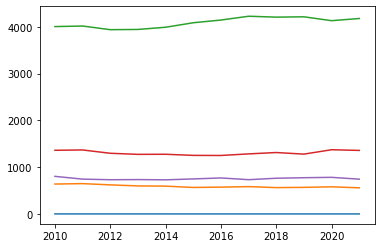

In [10]:
plt.plot(studentcountyears1.Year, studentcountyears1.Baltimore_City)
plt.plot(studentcountyears1.Year, studentcountyears1.Kent_County)
plt.plot(studentcountyears1.Year, studentcountyears1.Wicomico_County)
plt.plot(studentcountyears1.Year, studentcountyears1.Dorchester_County)
plt.plot(studentcountyears1.Year, studentcountyears1.Somerset_County)

***COUNTY STATS***

In [11]:
countystats.rename(columns = {'Annual Number of Public High School Graduates': 'highschoolgrads',
                    'Public School Student-Teacher Ratio':'studteachratio',
                    'Public School Expenditures Per Pupil ($ Dollars)':'expense_per_pupil',
                    'Bachelors Degree Attainment (%)':'bach_degree_pct', 
                    'High School Attainment (%)':'grad_rate_pct', 
                    '2-Year College Enrollment':'2_year_college_enrollment', 
                    '4-Year College/University Enrollment':'4_year_college_enrollment'}, inplace = True) 
countystats.head()

,County,highschoolgrads,studteachratio,expense_per_pupil,Bachelor's Degree Attainment (%),grad_rate_pct,Number of 2-Year Colleges,Number of 4-Year Colleges and Universities,2_year_college_enrollment,4_year_college_enrollment
0,Allegany County,642,13.9,13771,18.3,90.0,1,1,2586.0,4831.0
1,Anne Arundel County,5268,14.7,13648,40.9,92.1,1,2,12655.0,548.0
2,Baltimore City,4108,16.1,15376,31.2,84.9,1,11,4909.0,59254.0
3,Baltimore County,7171,15.1,13880,38.6,91.1,1,7,17732.0,42571.0
4,Calvert County,1227,15.7,14062,31.1,93.9,0,0,NaN,NaN


In [12]:
bottom5gradpct = countystats.sort_values(by = ['grad_rate_pct'], ascending=True).head(5)
bottom5gradpct

,County,highschoolgrads,studteachratio,expense_per_pupil,Bachelor's Degree Attainment (%),grad_rate_pct,Number of 2-Year Colleges,Number of 4-Year Colleges and Universities,2_year_college_enrollment,4_year_college_enrollment
19,Somerset County,153,12.4,16563,15.7,81.9,0,1,NaN,2886.0
5,Caroline County,355,13.8,13268,16.9,83.9,0,0,NaN,NaN
2,Baltimore City,4108,16.1,15376,31.2,84.9,1,11,4909.0,59254.0
16,Prince George's County,7898,14.0,14850,32.7,86.5,1,5,11789.0,106543.0
21,Washington County,1698,15.6,13220,21.4,86.9,1,0,3836.0,NaN


<BarContainer object of 5 artists>

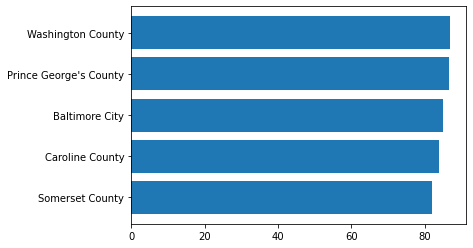

In [13]:
plt.barh(bottom5gradpct.County, bottom5gradpct.grad_rate_pct)

In [14]:
top5stratio = countystats.sort_values(by = ['studteachratio'], ascending=False).head(5)
top5stratio

,County,highschoolgrads,studteachratio,expense_per_pupil,Bachelor's Degree Attainment (%),grad_rate_pct,Number of 2-Year Colleges,Number of 4-Year Colleges and Universities,2_year_college_enrollment,4_year_college_enrollment
18,St. Mary's County,1175,16.3,12907,31.5,89.8,0,1,NaN,1512.0
2,Baltimore City,4108,16.1,15376,31.2,84.9,1,11,4909.0,59254.0
10,Frederick County,3032,16.0,12682,40.6,92.4,1,2,6112.0,4412.0
4,Calvert County,1227,15.7,14062,31.1,93.9,0,0,NaN,NaN
21,Washington County,1698,15.6,13220,21.4,86.9,1,0,3836.0,NaN


<BarContainer object of 5 artists>

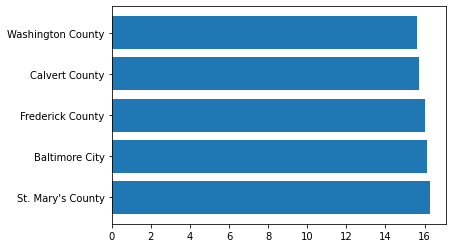

In [15]:
plt.barh(top5stratio.County, top5stratio.studteachratio)

In [16]:
top5pupilexpenses = countystats.sort_values(by = ['expense_per_pupil'], ascending=False).head(5)
top5pupilexpenses

,County,highschoolgrads,studteachratio,expense_per_pupil,Bachelor's Degree Attainment (%),grad_rate_pct,Number of 2-Year Colleges,Number of 4-Year Colleges and Universities,2_year_college_enrollment,4_year_college_enrollment
23,Worcester County,453,11.3,17814,30.4,90.9,0,0,NaN,NaN
19,Somerset County,153,12.4,16563,15.7,81.9,0,1,NaN,2886.0
15,Montgomery County,10970,14.5,15829,59.0,91.3,1,4,21260.0,3085.0
13,Howard County,4025,13.3,15449,61.4,95.5,1,2,9340.0,1446.0
2,Baltimore City,4108,16.1,15376,31.2,84.9,1,11,4909.0,59254.0


In [17]:
countystats.to_excel( r'C:\Users\macke\Documents\da7\projects\maryland-education\data\countrystats.xlsx',
                  sheet_name= 'your_sheet_name'
                )

In [20]:
cleandata = pd.read_csv('../data/marylandcounty1.csv')
cleandata

,County,Lat,Long,Salary,highschoolgrads,studteachratio,expense_per_pupil,Bachelor's Degree Attainment (%),grad_rate_pct,Number of 2-Year Colleges,Number of 4-Year Colleges and Universities,2_year_college_enrollment,4_year_college_enrollment
0,Baltimore City,39.290438,-76.612359,"$54,691.00",4108.0,16.1,15376.0,31.2,84.9,1.0,11.0,4909.0,59254.0
1,Baltimore County,39.372206,-76.612627,"$58,899.00",7171.0,15.1,13880.0,38.6,91.1,1.0,7.0,17732.0,42571.0
2,Harford County,39.534674,-76.290245,"$65,772.00",2679.0,14.7,13005.0,35.8,92.8,1.0,0.0,5705.0,NaN
3,Allegany County,39.621909,-78.802613,"$63,854.00",642.0,13.9,13771.0,18.3,90.0,1.0,1.0,2586.0,4831.0
4,Calvert County,38.506067,-76.517659,"$68,492.00",1227.0,15.7,14062.0,31.1,93.9,0.0,0.0,NaN,NaN
5,Anne Arundel County,39.057860,-76.576891,"$66,846.00",5268.0,14.7,13648.0,40.9,92.1,1.0,2.0,12655.0,548.0
6,Caroline County,38.875199,-75.830758,"$78,128.00",355.0,13.8,13268.0,16.9,83.9,0.0,0.0,NaN,NaN
7,Carroll County,39.553101,-77.010919,"$77,647.00",2121.0,14.3,13753.0,35.6,92.2,1.0,1.0,3126.0,2888.0
8,Cecil County,39.592628,-75.951459,"$86,724.00",1097.0,12.9,13641.0,22.8,89.0,1.0,0.0,2371.0,NaN
9,Charles County,38.522057,-76.972271,"$59,130.00",2107.0,15.2,13857.0,28.9,93.1,1.0,0.0,6351.0,NaN


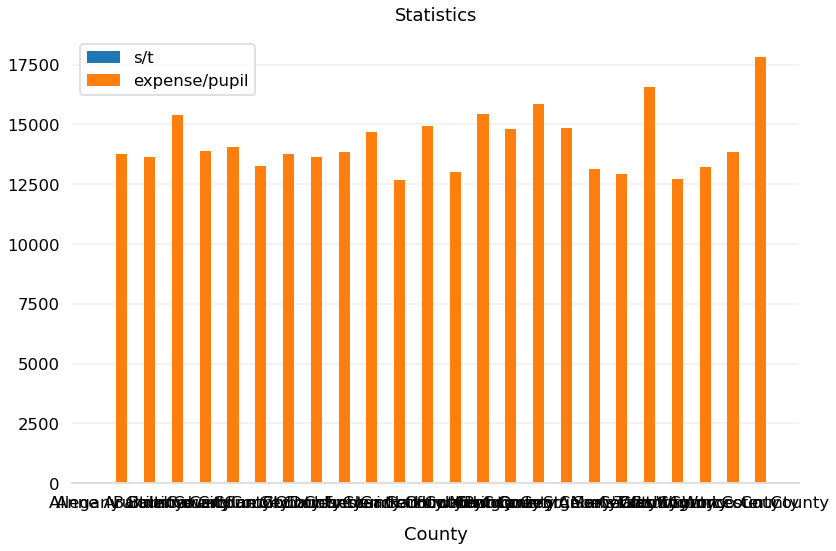

In [22]:
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(12, 8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
x = np.arange(len(countystats.County.unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(x, countystats.studteachratio,
            width=bar_width, label='s/t')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, countystats.expense_per_pupil,
            width=bar_width, label='expense/pupil')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(countystats.County.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('County', labelpad=15)
ax.set_ylabel('', labelpad=15)
ax.set_title('Statistics', pad=15)

fig.tight_layout()

